# Imports 

In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX
import os

import math
import random
from optparse import OptionParser

sys.path.append('/storage/user/jmao/gpu/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list, make_ratio_plot

import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

     
print(sys.version)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import pandas as pd
import pickle as pickle
import shlex
import uproot
import seaborn as sns

from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

from prettytable import PrettyTable
from pyjet import cluster

import xgboost as xgb
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier


Welcome to JupyROOT 6.22/02
3.6.8 (default, Apr  2 2020, 13:34:55) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [34]:
# root settings
rt.gROOT.SetBatch(True)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetOptFit(111)
rt.gStyle.SetPaintTextFormat("2.1f")

# plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["text.usetex"] = False
plt.rcParams["mathtext.fontset"] = "cm"

# test_name = 'xgb_HH_vs_QCD_ebBDT'

lumi_sf_sig = 137.0 # scale lumi from sample to full run2
lumi_sf_bkg = 137.0

#output dir

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201020/Data/2018/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201105/Data/2018/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201105/Data/2018/CutBased/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201105/Data/2018/CutBased/NoHcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201105/Data/2018/NoHcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201117/Data/2018/NoHcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201117/Data/2018/Hcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201117/Data/2018/Hcal_cutbase/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201117/Data/2018/NoHcal_cutbase/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/dnn_v3/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/cutbase/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/eff_plot_ak8_pt_thre/ak8_170/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/eff_plot_ak8_pt_thre/ak8_250/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/eff_plot_ak8_pt_thre/ak8_300/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/eff_plot_ak8_pt_thre/ak8_350/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/eff_plot_1lep_noak8thre/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210119/Data_2018/'
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/Data_2018/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/Data_2018_morebins/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/eff_plot_1lep_close_ak8_thre250/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/eff_plot_1lep_close_ak8_thre250/'

os.system("mkdir -p "+ plotDir)

0

# ALL BKG TAG EFF

In [4]:
tags = []
tags = [
    
#         'H(bb)H(bb), 200 GeV, 1 GeV, 1 m',
#         'QCD_HT_all, background',
#         'WLNu_HT_all, background',
#         'ZNunu_HT_all, background',
#         'TT_Lep, background',

        'Data 2018',
        ]


# directory
home_dir = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/'
# file names

fnames = {}


 
fnames['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = 'V1p17/v28/MC_Fall18/normalized/n3n2-n1-hbb-hbb_mh200_pl1000_ev100000_1pb_weighted.root'
fnames['Data 2018'] = 'V1p17/v28/Data2018/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-HighMET-17Sept2018_GoodLumi.root'


# get all the trees
tree = OrderedDict()

for tag in tags:
    print(home_dir+fnames[tag])

    root_dir = uproot.open(home_dir+fnames[tag])
    tree[tag] = root_dir['SusyLLPTree']

    print ('Open ready')
    print(tag)
    print ('Tree ready')
    print(tree[tag], tree)
    v = tree[tag]
    jet_amax = v['jetGammaMax_ET'].array()
    print(jet_amax[:10])
    jet_amax = v['weight'].array()
    print(jet_amax[:10])
    print(np.unique(jet_amax))
     


/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/V1p17/v28/Data2018/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-HighMET-17Sept2018_GoodLumi.root
Open ready
Data 2018
Tree ready
<TTree b'SusyLLPTree' at 0x7ff081925ac8> OrderedDict([('Data 2018', <TTree b'SusyLLPTree' at 0x7ff081925ac8>)])
[[] [0.47414213 0.4274462] [0.45923573 0.47951674 0.27918878 0.7676574 0.4250988 0.7304535] ... [0.47198224 0.4319515 0.46739426] [] [0.55735564]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.]


# Tag Eff Measurement Region

In [35]:
# trg_path=310
trg_path=467
njet_cut=-1
met_cut=200
mdphi_cut=0.5
veto=1

mt_cut=100
ht_cut=100

# jet_eta_cut=2.4
jet_eta_cut=1.48
jet_pt_cut=30
jet_time_cut=-1
jet_phoef_cut=0.8
jet_muef_cut=0.6
jet_eleef_cut=0.6


trg_jet_met = {}
trg_jet_nj = {}
trg_jet_mt = {}
trg_jet_ht = {}
trg_jet_mdphi = {}
trg_jet_w = {} 

trg_jet_nhcalhit = {}
trg_jet_hcalt = {}
trg_jet_dnn = {}
trg_jet_pt = {}
trg_jet_eta = {}
trg_jet_e = {}
trg_jet_phi = {}

trg_jet_chef = {}
trg_jet_muef = {}
trg_jet_eleef = {}
trg_jet_phoef = {}

trg_jet_nhef = {}
trg_jet_cemef = {}
trg_jet_nemef = {}

trg_jet_tmf = {}
trg_jet_dr = {}
trg_jet_time = {}

trg_jet_inak8 = {}

# trg_ak8jet_nj = {}
# trg_ak8jet_nj170 = {}
# trg_ak8jet_nj250 = {}
# trg_ak8jet_nj300 = {}
# trg_ak8jet_nj350 = {}
trg_ak8jet_pt = {}


for k,v in tree.items():
    print(k,v)

    # branches
    met = v['met'].array()
#     mt = v['MT_'].array()
    ht = v['HT'].array()
#     mdphi = v['jetMet_dPhi'].array()
    mdphi = v['jetMet_dPhiMin'].array()
    hlt = v['HLTDecision'].array()[:,trg_path]
    nj = v['nJets'].array()
    nlep = v['nLeptons'].array()
    nmu = v['nMuons'].array()
    nele = v['nElectrons'].array()
    ntau = v['nTaus'].array()
    npho = v['nPhotons'].array()
    
    mt = v['MT'].array()
    
    #flags
    flag1 =  v['Flag2_globalSuperTightHalo2016Filter'].array()
#     flag2 =  v['Flag2_globalTightHalo2016Filter'].array() 
#     flag3 =  v['Flag2_goodVertices'].array()
#     flag4 =  v['Flag2_BadChargedCandidateFilter'].array() 
    flag5 =  v['Flag2_BadPFMuonFilter'].array() 
    flag6 =  v['Flag2_EcalDeadCellTriggerPrimitiveFilter'].array() 
    flag7 =  v['Flag2_HBHENoiseFilter'].array() 
    flag8 =  v['Flag2_HBHEIsoNoiseFilter'].array() 
    flag9 =  v['Flag2_ecalBadCalibFilter'].array() 
    flag10 =  v['Flag2_eeBadScFilter'].array() 
    
    nhcalhit = v['jetNRecHitsHcal'].array()
    hcalt = v['jetTimeRecHitsHcal'].array()    
        
    #ak8 jet var
    ak8pt = v['fatJetPt'].array()
#     ak8eta = v['fatJetEta'].array()
    
    
    #jet var
#     dnn = v['jetDNNScore'].array()
    inak8 = v['jetIn250AK8'].array()
    dnn = v['jetDNNScoreV3'].array()
    pt = v['jetPt'].array()
    eta = v['jetEta'].array()
    e = v['jetE'].array()
    phi = v['jetPhi'].array()
    
    chef = v['jetChargedHadronEnergyFraction'].array()
    muef = v['jetMuonEnergyFraction'].array()
    eleef = v['jetElectronEnergyFraction'].array()
    phoef = v['jetPhotonEnergyFraction'].array()
    
#     nhef = v['jetNeutralHadronEnergyFraction'].array()
#     cemef = v['jetNeutralEMEnergyFraction'].array()
#     nemef = v['jetNeutralEMEnergyFraction'].array()
 
    tmf = v['jetGammaMax_ET'].array()
    dr = v['jetMinDeltaRPVTracks'].array()
    time = v['jetTime'].array()

    weight = v['weight'].array()
    
    print(weight.shape)
    
    #selection
    
    sel_hlt_triggered = 1
    sel_hlt_str  = np.logical_and(sel_hlt_triggered, hlt)
    
    sel_flag_str = np.logical_and(flag1, flag5)
    sel_flag_str = np.logical_and(sel_flag_str, flag6)
    sel_flag_str = np.logical_and(sel_flag_str, flag7)
    sel_flag_str = np.logical_and(sel_flag_str, flag8)
    sel_flag_str = np.logical_and(sel_flag_str, flag9)
    if 'Data' in k:
        sel_flag_str = np.logical_and(sel_flag_str, flag10)

    basic_met_str = np.logical_and(nj>njet_cut, met>met_cut)    
    basic_met_str = np.logical_and(basic_met_str, pt.count()>njet_cut)
    basic_met_str = np.logical_and(basic_met_str, nlep==1)
    basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
#     basic_met_str = np.logical_and(basic_met_str, ht>ht_cut)
    
    if veto==1:
#         basic_met_str = np.logical_and(basic_met_str, nmu==0)
#         basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, ntau==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
    
    basic_jet_str = np.logical_and(abs(eta)<jet_eta_cut, pt>jet_pt_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, time>jet_time_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, phoef<jet_phoef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, muef<jet_muef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, eleef<jet_eleef_cut)   
#     basic_jet_str = np.logical_and(basic_jet_str, nhcalhit>0)   
#     basic_jet_str = np.logical_and(basic_jet_str, hcalt>-100)  

    met_trg_str = np.logical_and(basic_met_str, sel_hlt_str)
    met_trg_str = np.logical_and(basic_met_str, sel_flag_str)
#     met_trg_str = np.logical_and(basic_met_str, mdphi>mdphi_cut)
#     met_trg_str = np.logical_and(basic_met_str, mdphi<=mdphi_cut)
    
#   sel 
#     trg_jet_met[k] = met
#     trg_jet_nj[k] = nj 
#     trg_jet_w[k] = weight 
# #     trg_jet_mt[k] = mt
#     trg_jet_ht[k] = ht
#     trg_jet_mdphi[k] = mdphi
    
#     trg_jet_pt[k] = pt
#     trg_jet_eta[k] = eta
#     trg_jet_e[k] = e
#     trg_jet_phi[k] = phi
#     trg_jet_chef[k] = chef
#     trg_jet_nhef[k] = nhef
#     trg_jet_cemef[k] = cemef
#     trg_jet_nemef[k] = nemef
    
    #apply sel
    trg_jet_met[k] = met[met_trg_str]
    trg_jet_ht[k] = ht[met_trg_str]
    trg_jet_mdphi[k] = mdphi[met_trg_str]
    trg_jet_nj[k] = nj[met_trg_str]
    trg_jet_w[k] = weight[met_trg_str]

    trg_jet_nhcalhit[k] = nhcalhit[basic_jet_str][met_trg_str]
    trg_jet_hcalt[k] = hcalt[basic_jet_str][met_trg_str]
    trg_jet_dnn[k] = dnn[basic_jet_str][met_trg_str]
    trg_jet_pt[k] = pt[basic_jet_str][met_trg_str]
    trg_jet_phi[k] = phi[basic_jet_str][met_trg_str]
    trg_jet_eta[k] = eta[basic_jet_str][met_trg_str]
    trg_jet_e[k] = e[basic_jet_str][met_trg_str]
    
    trg_jet_inak8[k] = inak8[basic_jet_str][met_trg_str]
    
    trg_ak8jet_pt[k] = ak8pt[met_trg_str]

#     trg_jet_nhm[k] = nhm[basic_jet_str][met_trg_str]
#     trg_jet_chm[k] = chm[basic_jet_str][met_trg_str]
#     trg_jet_mum[k] = mum[basic_jet_str][met_trg_str]
#     trg_jet_elem[k] = elem[basic_jet_str][met_trg_str]
#     trg_jet_phom[k] = phom[basic_jet_str][met_trg_str]
    
#     trg_jet_nhef[k] = nhef[basic_jet_str][met_trg_str]
    trg_jet_chef[k] = chef[basic_jet_str][met_trg_str]
    trg_jet_muef[k] = muef[basic_jet_str][met_trg_str]
    trg_jet_eleef[k] = eleef[basic_jet_str][met_trg_str]
    trg_jet_phoef[k] = phoef[basic_jet_str][met_trg_str]
    
#     trg_jet_csv[k] = csv[basic_jet_str][met_trg_str]
    
#     trg_jet_nrec[k] = nrec[basic_jet_str][met_trg_str]
    trg_jet_time[k] = time[basic_jet_str][met_trg_str]
    trg_jet_dr[k] = dr[basic_jet_str][met_trg_str]
    trg_jet_tmf[k] = tmf[basic_jet_str][met_trg_str]
#     trg_jet_amax[k] = amax[basic_jet_str][met_trg_str]

    #clean up
    trg_jet_met[k] = trg_jet_met[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_ht[k] = trg_jet_ht[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_mdphi[k] = trg_jet_mdphi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_nj[k] = trg_jet_nj[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_w[k] = trg_jet_w[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_phi[k] = trg_jet_phi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eta[k] = trg_jet_eta[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_e[k] = trg_jet_e[k][trg_jet_pt[k].count()>njet_cut]

#     trg_jet_nhm[k] = trg_jet_nhm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_chm[k] = trg_jet_chm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_mum[k] = trg_jet_mum[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_elem[k] = trg_jet_elem[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_phom[k] = trg_jet_phom[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nhef[k] = trg_jet_nhef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_chef[k] = trg_jet_chef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_muef[k] = trg_jet_muef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eleef[k] = trg_jet_eleef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_phoef[k] = trg_jet_phoef[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_csv[k] = trg_jet_csv[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nrec[k] = trg_jet_nrec[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_time[k] = trg_jet_time[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dr[k] = trg_jet_dr[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_tmf[k] = trg_jet_tmf[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_amax[k] = trg_jet_amax[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_nhcalhit[k] = trg_jet_nhcalhit[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_hcalt[k] = trg_jet_hcalt[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dnn[k] = trg_jet_dnn[k][trg_jet_pt[k].count()>njet_cut]
    
    trg_jet_inak8[k] = trg_jet_inak8[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_ak8jet_pt[k] = trg_ak8jet_pt[k][trg_jet_pt[k].count()>njet_cut]
    
    trg_jet_pt[k] = trg_jet_pt[k][trg_jet_pt[k].count()>njet_cut]

    #print out check


    print(len(trg_jet_w[k]))
    print(len(trg_jet_pt[k]))
    print(len(trg_ak8jet_pt[k]))

    

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>
(8428507,)
759522
759522
759522


In [5]:
print(len(trg_jet_w[k]))
print(len(trg_jet_pt[k]))
print(len(trg_ak8jet_pt[k]))


759522
759522
759522


# Tags

In [36]:
 
nJets = {}
nFatJets = {}
nFatJets170 = {}
nFatJets250 = {}
nFatJets300 = {}
nFatJets350 = {}

 
for k,v in tree.items():
    print(k,v)
    
    nJets[k] = trg_jet_pt[k].count()
    nFatJets[k] = trg_ak8jet_pt[k].count()
    nFatJets170[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>170].count()
    nFatJets250[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>250].count()
    nFatJets300[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>300].count()
    nFatJets350[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>350].count()
    
 

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>


In [37]:
time_cut = 0.09
tmf_cut = 0.16 
dr_cut = 0.06 
chef_cut = 0.06 

# dnn_cut = 0.90
# dnn_cut = 0.996
dnn_cut = 0.99

nTags = {}

tag_jet_pt = {}

nTagsNoInAK8 = {}
tag_jet_pt_NoInAK8 = {}

 
for k,v in tree.items():
    print(k,v)
   
    
    #tag cuts
#     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-100, trg_jet_nhcalhit[k]>0) 
#     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-1000, trg_jet_nhcalhit[k]>-10) 
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_tmf[k]<tmf_cut)
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_dr[k]>dr_cut)
#     tagged_jet = np.logical_and(trg_jet_tmf[k]<tmf_cut, trg_jet_dr[k]>dr_cut)
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_time[k]>time_cut)
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_chef[k]<chef_cut) 
#     tagged_evt = np.logical_and(nFatJets170[k]==0, 1) 
    tagged_jet = np.logical_and(1, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(1, trg_jet_dnn[k]>dnn_cut) 
    
    
#     tagged_jet = np.logical_and(nFatJets170[k]==0, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(nFatJets250[k]==0, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(nFatJets300[k]==0, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(nFatJets350[k]==0, trg_jet_dnn[k]>dnn_cut) 
    
   
    nTags[k] = trg_jet_pt[k][tagged_jet].count()

    
    tag_jet_pt[k] = trg_jet_pt[k][tagged_jet] 
 
    
    print(trg_jet_pt[k][:10])
    print(tag_jet_pt[k][:10])
    
#     print(np.unique(nJets[k]))
    print(np.unique(nTags[k]))
    
    i=0
    for i,ele in enumerate(nTags[k]):
        if ele > 2:
            nTags[k][i] = 2
            
    print(np.unique(nTags[k]))
    
    tagged_jet_NoInAK8 = np.logical_and(trg_jet_inak8[k]==0, trg_jet_dnn[k]>dnn_cut) 
    nTagsNoInAK8[k] = trg_jet_pt[k][tagged_jet_NoInAK8].count()
    tag_jet_pt_NoInAK8[k] = trg_jet_pt[k][tagged_jet_NoInAK8] 
    
    print(tag_jet_pt_NoInAK8[k][:10])
    
    print(np.unique(nTagsNoInAK8[k]))
    
    i=0
    for i,ele in enumerate(nTagsNoInAK8[k]):
        if ele > 2:
            nTagsNoInAK8[k][i] = 2
            
    print(np.unique(nTagsNoInAK8[k]))
    
    print(len(nTags[k]))
    print(len(nTagsNoInAK8[k]))
    

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>
[[304.70297] [102.77982 88.73353] [464.5952] ... [160.77945 137.4149] [90.15853 57.324917] []]
[[] [] [] ... [] [] []]
[0 1]
[0 1]
[[] [] [] ... [] [] []]
[0 1]
[0 1]
759522
759522


In [69]:
# # time_cut = 0.08676443430239597
# # tmf_cut = 0.16335152541277656 
# # dr_cut = 0.06402562462487048
# # chef_cut = 0.061590940809278155

# time_cut = 0.09
# tmf_cut = 0.16 
# dr_cut = 0.06 
# chef_cut = 0.06 

# # dnn_cut = 0.90
# # dnn_cut = 0.996
# dnn_cut = 0.99

# nTags = {}
# nJets = {}
# nFatJets = {}
# nFatJets170 = {}
# nFatJets250 = {}
# nFatJets300 = {}
# nFatJets350 = {}

# tag_jet_pt = {}
# # tag_jet_eta = {}
# # tag_jet_phi = {}
# # tag_jet_e = {}

# # tag_jet_chef = {}
# # tag_jet_tmf = {}
# # tag_jet_time = {}
# # tag_jet_dr = {}

# # tag_jet_phoef = {}
# # tag_jet_eleef = {}
# # tag_jet_muef = {}

# # untag_jet_pt = {}
# # untag_jet_eta = {}
# # untag_jet_phi = {}
# # untag_jet_e = {}

# # untag_jet_chef = {}
# # untag_jet_tmf = {}
# # untag_jet_time = {}
# # untag_jet_dr = {}

# # untag_jet_phoef = {}
# # untag_jet_eleef = {}
# # untag_jet_muef = {}

# for k,v in tree.items():
#     print(k,v)
    
#     nJets[k] = trg_jet_pt[k].count()
#     nFatJets[k] = trg_ak8jet_pt[k].count()
#     nFatJets170[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>170].count()
#     nFatJets250[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>250].count()
#     nFatJets300[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>300].count()
#     nFatJets350[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>350].count()
    
#     #tag cuts
# #     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-100, trg_jet_nhcalhit[k]>0) 
# #     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-1000, trg_jet_nhcalhit[k]>-10) 
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_tmf[k]<tmf_cut)
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_dr[k]>dr_cut)
# #     tagged_jet = np.logical_and(trg_jet_tmf[k]<tmf_cut, trg_jet_dr[k]>dr_cut)
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_time[k]>time_cut)
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_chef[k]<chef_cut) 
#     tagged_evt = np.logical_and(nFatJets[k]==0, 1) 
#     tagged_jet = np.logical_and(1, trg_jet_dnn[k]>dnn_cut) 
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_dnn[k]>dnn_cut) 
# #     tagged_jet = np.logical_and(1, trg_jet_dnn[k]>dnn_cut) 
    
# #     untagged_jet = np.logical_not(tagged_jet) 
    
#     nTags[k] = trg_jet_pt[k][tagged_jet].count()
    
#     tag_jet_pt[k] = trg_jet_pt[k][tagged_jet] 
# #     tag_jet_eta[k] = trg_jet_eta[k][tagged_jet] 
# #     tag_jet_e[k] = trg_jet_e[k][tagged_jet] 
# #     tag_jet_phi[k] = trg_jet_phi[k][tagged_jet]
    
# #     tag_jet_chef[k] = trg_jet_chef[k][tagged_jet] 
# #     tag_jet_tmf[k] = trg_jet_tmf[k][tagged_jet] 
# #     tag_jet_time[k] = trg_jet_time[k][tagged_jet] 
# #     tag_jet_dr[k] = trg_jet_dr[k][tagged_jet] 
    
# #     tag_jet_phoef[k] = trg_jet_phoef[k][tagged_jet] 
# #     tag_jet_muef[k] = trg_jet_muef[k][tagged_jet] 
# #     tag_jet_eleef[k] = trg_jet_eleef[k][tagged_jet] 
    
# #     untag_jet_pt[k] = trg_jet_pt[k][untagged_jet] 
# #     untag_jet_eta[k] = trg_jet_eta[k][untagged_jet] 
# #     untag_jet_e[k] = trg_jet_e[k][untagged_jet] 
# #     untag_jet_phi[k] = trg_jet_phi[k][untagged_jet]
    
# #     untag_jet_chef[k] = trg_jet_chef[k][untagged_jet] 
# #     untag_jet_tmf[k] = trg_jet_tmf[k][untagged_jet] 
# #     untag_jet_time[k] = trg_jet_time[k][untagged_jet] 
# #     untag_jet_dr[k] = trg_jet_dr[k][untagged_jet] 
    
# #     untag_jet_phoef[k] = trg_jet_phoef[k][untagged_jet] 
# #     untag_jet_muef[k] = trg_jet_muef[k][untagged_jet] 
# #     untag_jet_eleef[k] = trg_jet_eleef[k][untagged_jet] 
    
#     print(trg_jet_pt[k][:10])
#     print(tag_jet_pt[k][:10])
# #     print(untag_jet_pt[k][:10])
    
#     print(np.unique(nJets[k]))
#     print(np.unique(nTags[k]))
    
#     for i,ele in enumerate(nTags[k]):
#         if ele > 2:
#             nTags[k][i] = 2
            
#     print(np.unique(nTags[k]))
    

# Tag Eff

In [38]:
from itertools import chain 

wall = {}
wnum = {}

#var
pt_denall = {}
pt_numall = {}

#h1s
pt_den_all = {}
pt_num_all = {}

#pEffs of h1
pt_pEff = {}
 
wnum_NoInAK8 = {}
pt_numall_NoInAK8 = {}
pt_num_all_NoInAK8 = {}
pt_pEff_NoInAK8 = {}


for k,v in tree.items():
    print(k,v)
    
    # denominator
    pt_denall[k] = np.array(trg_jet_pt[k].flatten())
    
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(pt_denall[k]))
    print(len(wall[k]))
  
    #numerator
    pt_numall[k] = np.array(tag_jet_pt[k].flatten())
    
    wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k], tag_jet_pt[k])]
    wnum[k] = list(chain.from_iterable(wnum[k])) 
    
    print(len(pt_numall[k]))
    print(len(wnum[k]))
    
    #pt histogram
    pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wall[k])
    pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum[k])

    print(pt_den_all[k].GetNbinsX())
    
    #rebin 
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
    x=array('d', [1,10,20,30,40,50,60,70,80,90,100,1000])
    
    pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
    pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
    print(pt_den_all[k].GetNbinsX())
    
    #efficiency
    pt_pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
 
    #numerator
    pt_numall_NoInAK8[k] = np.array(tag_jet_pt_NoInAK8[k].flatten())
    
    wnum_NoInAK8[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k], tag_jet_pt_NoInAK8[k])]
    wnum_NoInAK8[k] = list(chain.from_iterable(wnum_NoInAK8[k])) 
    
    print(len(pt_numall_NoInAK8[k]))
    print(len(wnum_NoInAK8[k]))
    
    #pt histogram
    pt_num_all_NoInAK8[k] = create_TH1D( pt_numall_NoInAK8[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum_NoInAK8[k])
    
    #rebin 
    pt_num_all_NoInAK8[k]=pt_num_all_NoInAK8[k].Rebin(len(x)-1,'',x)
    
    #efficiency
    pt_pEff_NoInAK8[k] = rt.TEfficiency(pt_num_all_NoInAK8[k], pt_den_all[k])
 

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>
1172577
1172577
387
387
100
11
282
282


Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent


In [70]:
# from itertools import chain 

# wall = {}
# wnum = {}

# #var
# pt_denall = {}
# # eta_denall = {}
# # phi_denall = {}
# pt_numall = {}
# # eta_numall = {}
# # phi_numall = {}

# #h1s
# pt_den_all = {}
# # eta_den_all = {}
# # phi_den_all = {}
# pt_num_all = {}
# # eta_num_all = {}
# # phi_num_all = {}

# #pEffs of h1
# pt_pEff = {}
# # eta_pEff = {}
# # phi_pEff = {}

# #h2s
# # pt_eta_den_all = {}
# # pt_phi_den_all = {}
# # pt_eta_num_all = {}
# # pt_phi_num_all = {}

# # #pEffs of h2
# # pt_eta_pEff = {}
# # pt_phi_pEff = {}

# for k,v in tree.items():
#     print(k,v)
    
#     # denominator
#     pt_denall[k] = np.array(trg_jet_pt[k].flatten())
# #     eta_denall[k] = np.array(trg_jet_eta[k].flatten())
# #     phi_denall[k] = np.array(trg_jet_phi[k].flatten())
    
#     wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
#     wall[k] = list(chain.from_iterable(wall[k])) 
    
#     print(len(pt_denall[k]))
# #     print(len(eta_denall[k]))
#     print(len(wall[k]))
    
  
#     #numerator
#     pt_numall[k] = np.array(tag_jet_pt[k].flatten())
# #     eta_numall[k] =  np.array(tag_jet_eta[k].flatten())
# #     phi_numall[k] =  np.array(tag_jet_phi[k].flatten())
    
#     wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k], tag_jet_pt[k])]
#     wnum[k] = list(chain.from_iterable(wnum[k])) 
    
# #     print(len(trg_jet_w[k]))
# #     print(len(tag_jet_pt[k]))
    
#     print(len(pt_numall[k]))
# #     print(len(eta_numall[k]))
# #     print(max(eta_numall[k]))
# #     print(min(eta_numall[k]))
# #     print(eta_numall[k])
# #     print(pt_numall[k])
#     print(len(wnum[k]))
    
#     #pt histogram
# #     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[20,-0,1000], weights=wall[k])
# #     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[20,-0,1000], weights=wnum[k])
#     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wall[k])
#     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum[k])

#     print(pt_den_all[k].GetNbinsX())
    
#     #rebin 
# #     x=array('d', [10*ix for ix in range(100)])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
# #     x=array('d', [1,10,20,30,40,50,60,70,80,90,100])
# #     x=array('d', [1,100,200,300,400,500,600,700,800,900])
    
#     pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
#     pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
#     print(pt_den_all[k].GetNbinsX())

    
# #     #eta histogram
# #     eta_den_all[k] = create_TH1D( eta_denall[k], axis_title=['jetEta ', 'fraction of events'], name="", binning=[20,-1.5,1.5], weights=wall[k])
# #     eta_num_all[k] = create_TH1D( eta_numall[k], axis_title=['jetEta', 'fraction of events'], name="", binning=[20,-1.5,1.5], weights=wnum[k])
  
# #     phi_den_all[k] = create_TH1D( phi_denall[k], axis_title=['jetPhi ', 'fraction of events'], name="", binning=[20,-3.15,3.15], weights=wall[k])
# #     phi_num_all[k] = create_TH1D( phi_numall[k], axis_title=['jetPhi', 'fraction of events'], name="", binning=[20,-3.15,3.15], weights=wnum[k])
  
#     #efficiency
#     pt_pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
# #     eta_pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
# #     phi_pEff[k] = rt.TEfficiency(phi_num_all[k], phi_den_all[k])
# #     print(pt_pEff[k].GetPassedHistogram().GetNbinsX())
    
# #     #2d ones
# #     pt_eta_den_all[k] = create_TH2D(np.vstack((pt_denall[k], eta_denall[k])).T, name='', title=None, binning=[20,0,1000,20,-1.5,1.5], weights=wall[k], axis_title = ['jetPt [GeV]','jetEta', ''])
# #     pt_eta_num_all[k] = create_TH2D(np.vstack((pt_numall[k], eta_numall[k])).T, name='', title=None, binning=[20,0,1000,20,-1.5,1.5], weights=wnum[k], axis_title = ['jetPt [GeV]','jetEta', ''])

# #     pt_phi_den_all[k] = create_TH2D(np.vstack((pt_denall[k], phi_denall[k])).T, name='', title=None, binning=[20,0,1000,20,-3.15,3.15], weights=wall[k], axis_title = ['jetPt [GeV]','jetPhi', ''])
# #     pt_phi_num_all[k] = create_TH2D(np.vstack((pt_numall[k], phi_numall[k])).T, name='', title=None, binning=[20,0,1000,20,-3.15,3.15], weights=wnum[k], axis_title = ['jetPt [GeV]','jetPhi', ''])
    
# #     #2d efficiency
# #     pt_eta_pEff[k] = rt.TEfficiency(pt_eta_num_all[k], pt_eta_den_all[k])
# #     pt_phi_pEff[k] = rt.TEfficiency(pt_phi_num_all[k], pt_phi_den_all[k])  
    

Data 2018 <TTree b'SusyLLPTree' at 0x7f011ee76400>
1172577
1172577
387
387
100
19


Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent


In [39]:
variables = [
    
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.002],
#         ['jetPt [GeV]', pt_pEff_NoInAK8, 'pt', -0.0002, 0.001],
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.02],
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetEta', eta_pEff, 'eta', -0.0002, 0.01],
#         ['jetPhi', phi_pEff, 'phi', -0.0002, 0.01],
        
]

var/x_axis jetPt [GeV] name pt range -0.0002 0.002
Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/Data_2018/tag_eff_jet_pt_rebin.png has been created


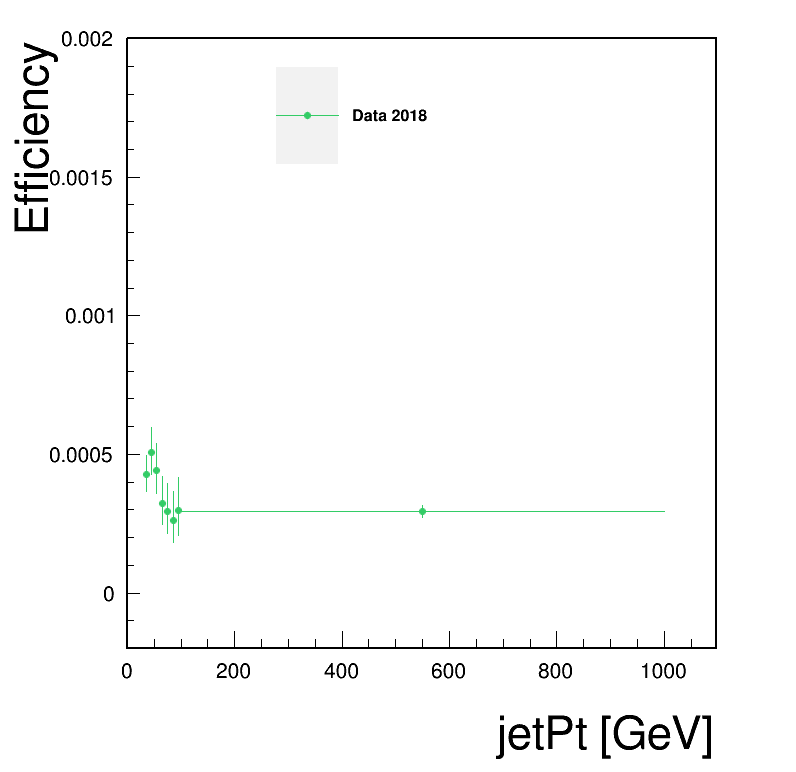

In [40]:

   

color_list = [845,800,861,806,1,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    # c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


var/x_axis jetPt [GeV] name pt range -0.0002 0.002
Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/Data_2018/tag_eff_jet_pt_rebin_logX.png has been created


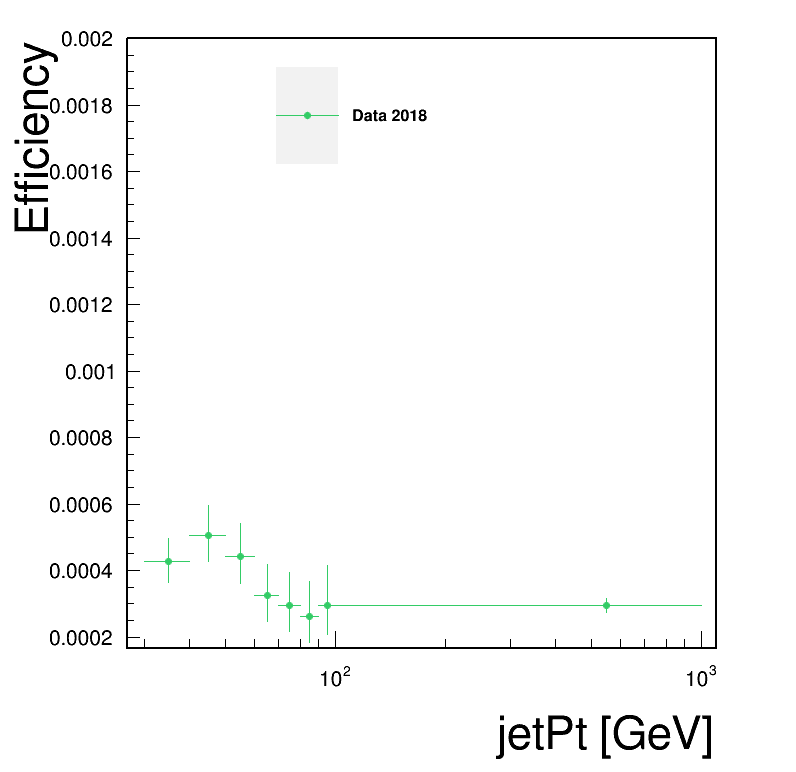

In [41]:

   

color_list = [845,800,861,806,1,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin_logX.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    c.SetLogx()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


In [19]:
variables = [
    
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.001],
        ['jetPt [GeV]', pt_pEff_NoInAK8, 'pt', -0.0002, 0.001, pt_pEff, 'Not In AK8', 'Inclusive'],
        
]

var/x_axis jetPt [GeV] name pt range -0.0002 0.001
Data 2018 <TTree b'SusyLLPTree' at 0x7fd7be54c6d8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/Data_2018/ak8_dnnv3/eff_plot_1lep_close_ak8_thre250/tag_eff_jet_compare_rebin_logX.png has been created


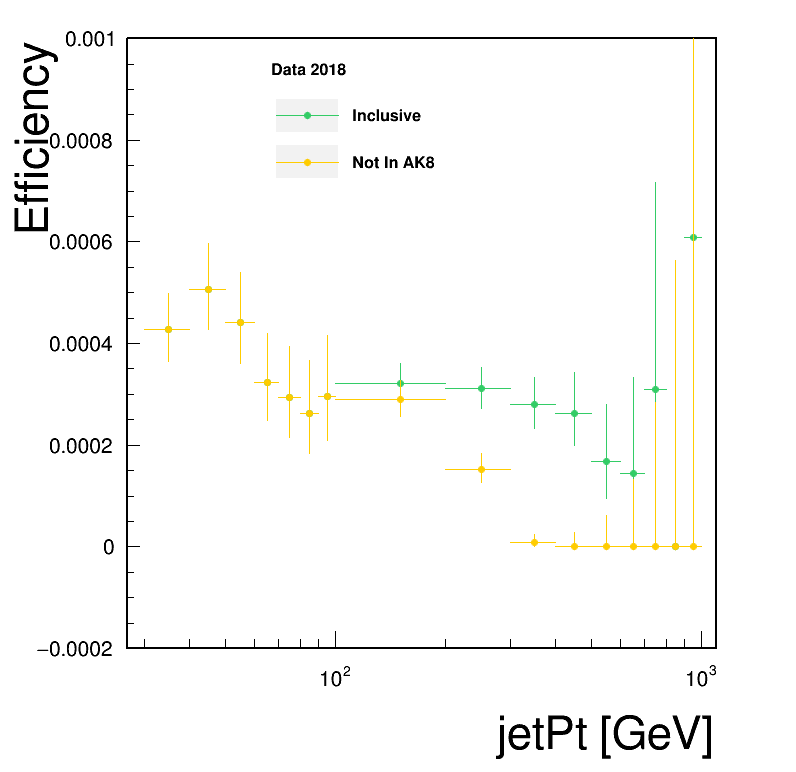

In [22]:

   

color_list = [845,800,861,806,1,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    outf = 'tag_eff_jet_compare_rebin_logX.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)

        if 'bb' not in k:

            
            pEff[k+'com'] = var[5][k]
            pEff[k+'com'].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k+'com'].SetLineColor(color_list[i])
            pEff[k+'com'].SetMarkerColor(color_list[i])
            pEff[k+'com'].SetMarkerSize(0.8)
            pEff[k+'com'].SetMarkerStyle(20)

            if i==0:
                pEff[k+'com'].Draw("apez")
            else:
                pEff[k+'com'].Draw("pezsame")
                
            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k+'com'].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k+'com'].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k+'com'].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k+'com'].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k+'com'].GetPaintedGraph().SetMinimum(var[3])
            pEff[k+'com'].GetPaintedGraph().SetMaximum(var[4])
            pEff[k+'com'].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k+'com'].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


            leg.AddEntry(pEff[k+'com'],var[7])
            i += 1
            
            pEff[k] = var[1][k]
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


            leg.SetHeader(k)
            leg.AddEntry(pEff[k],var[6])
            
            


    leg.Draw()

    c.SetLogx()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


# Prediction Region

In [42]:
# trg_path=310
trg_path=467
njet_cut=-1
met_cut=200
mdphi_cut=0.5
veto=1
ht_cut=100

# jet_eta_cut=2.4
jet_eta_cut=1.48
jet_pt_cut=30
jet_time_cut=-1
jet_phoef_cut=0.8
jet_muef_cut=0.6
jet_eleef_cut=0.6


trg_jet_met = {}
trg_jet_nj = {}
trg_jet_mt = {}
trg_jet_ht = {}
trg_jet_mdphi = {}
trg_jet_w = {} 

trg_jet_nhcalhit = {}
trg_jet_hcalt = {}
trg_jet_dnn = {}
trg_jet_pt = {}
trg_jet_eta = {}
trg_jet_e = {}
trg_jet_phi = {}

trg_jet_chef = {}
trg_jet_muef = {}
trg_jet_eleef = {}
trg_jet_phoef = {}

trg_jet_nhef = {}
trg_jet_cemef = {}
trg_jet_nemef = {}

trg_jet_tmf = {}
trg_jet_dr = {}
trg_jet_time = {}

trg_ak8jet_pt = {}


for k,v in tree.items():
    print(k,v)

    # branches
    met = v['met'].array()
#     mt = v['MT_'].array()
    ht = v['HT'].array()
#     mdphi = v['jetMet_dPhi'].array()
    mdphi = v['jetMet_dPhiMin'].array()
    hlt = v['HLTDecision'].array()[:,trg_path]
    nj = v['nJets'].array()
    nlep = v['nLeptons'].array()
    nmu = v['nMuons'].array()
    nele = v['nElectrons'].array()
    ntau = v['nTaus'].array()
    npho = v['nPhotons'].array()
    
    #flags
    flag1 =  v['Flag2_globalSuperTightHalo2016Filter'].array()
#     flag2 =  v['Flag2_globalTightHalo2016Filter'].array() 
#     flag3 =  v['Flag2_goodVertices'].array()
#     flag4 =  v['Flag2_BadChargedCandidateFilter'].array() 
    flag5 =  v['Flag2_BadPFMuonFilter'].array() 
    flag6 =  v['Flag2_EcalDeadCellTriggerPrimitiveFilter'].array() 
    flag7 =  v['Flag2_HBHENoiseFilter'].array() 
    flag8 =  v['Flag2_HBHEIsoNoiseFilter'].array() 
    flag9 =  v['Flag2_ecalBadCalibFilter'].array() 
    flag10 =  v['Flag2_eeBadScFilter'].array() 
    
    nhcalhit = v['jetNRecHitsHcal'].array()
    hcalt = v['jetTimeRecHitsHcal'].array()    
   
    ak8pt = v['fatJetPt'].array()

    #jet var
    dnn = v['jetDNNScoreV3'].array()
#     dnn = v['jetDNNScore'].array()
    pt = v['jetPt'].array()
    eta = v['jetEta'].array()
    e = v['jetE'].array()
    phi = v['jetPhi'].array()
    
    chef = v['jetChargedHadronEnergyFraction'].array()
    muef = v['jetMuonEnergyFraction'].array()
    eleef = v['jetElectronEnergyFraction'].array()
    phoef = v['jetPhotonEnergyFraction'].array()
    
#     nhef = v['jetNeutralHadronEnergyFraction'].array()
#     cemef = v['jetNeutralEMEnergyFraction'].array()
#     nemef = v['jetNeutralEMEnergyFraction'].array()
 
    tmf = v['jetGammaMax_ET'].array()
    dr = v['jetMinDeltaRPVTracks'].array()
    time = v['jetTime'].array()

    weight = v['weight'].array()
    
    print(weight.shape)
    
    #selection
    
    sel_hlt_triggered = 1
    sel_hlt_str  = np.logical_and(sel_hlt_triggered, hlt)
    
    sel_flag_str = np.logical_and(flag1, flag5)
    sel_flag_str = np.logical_and(sel_flag_str, flag6)
    sel_flag_str = np.logical_and(sel_flag_str, flag7)
    sel_flag_str = np.logical_and(sel_flag_str, flag8)
    sel_flag_str = np.logical_and(sel_flag_str, flag9)
    if 'Data' in k:
        sel_flag_str = np.logical_and(sel_flag_str, flag10)

    basic_met_str = np.logical_and(nj>njet_cut, met>met_cut)    
    basic_met_str = np.logical_and(basic_met_str, pt.count()>njet_cut)
    basic_met_str = np.logical_and(basic_met_str, nlep==0)
#     basic_met_str = np.logical_and(basic_met_str, ht>ht_cut)
    
    if veto==1:
        basic_met_str = np.logical_and(basic_met_str, nmu==0)
        basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, ntau==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
    
    basic_jet_str = np.logical_and(abs(eta)<jet_eta_cut, pt>jet_pt_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, time>jet_time_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, phoef<jet_phoef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, muef<jet_muef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, eleef<jet_eleef_cut)   
#     basic_jet_str = np.logical_and(basic_jet_str, nhcalhit>0)   
#     basic_jet_str = np.logical_and(basic_jet_str, hcalt>-100)  

    met_trg_str = np.logical_and(basic_met_str, sel_hlt_str)
    met_trg_str = np.logical_and(basic_met_str, sel_flag_str)
#     met_trg_str = np.logical_and(basic_met_str, mdphi>mdphi_cut)
#     met_trg_str = np.logical_and(basic_met_str, mdphi<=mdphi_cut)
    
#   sel 
#     trg_jet_met[k] = met
#     trg_jet_nj[k] = nj 
#     trg_jet_w[k] = weight 
# #     trg_jet_mt[k] = mt
#     trg_jet_ht[k] = ht
#     trg_jet_mdphi[k] = mdphi
    
#     trg_jet_pt[k] = pt
#     trg_jet_eta[k] = eta
#     trg_jet_e[k] = e
#     trg_jet_phi[k] = phi
#     trg_jet_chef[k] = chef
#     trg_jet_nhef[k] = nhef
#     trg_jet_cemef[k] = cemef
#     trg_jet_nemef[k] = nemef
    
    #apply sel
    trg_jet_met[k] = met[met_trg_str]
    trg_jet_ht[k] = ht[met_trg_str]
    trg_jet_mdphi[k] = mdphi[met_trg_str]
    trg_jet_nj[k] = nj[met_trg_str]
    trg_jet_w[k] = weight[met_trg_str]

    trg_jet_nhcalhit[k] = nhcalhit[basic_jet_str][met_trg_str]
    trg_jet_hcalt[k] = hcalt[basic_jet_str][met_trg_str]
    trg_jet_dnn[k] = dnn[basic_jet_str][met_trg_str]
    trg_jet_pt[k] = pt[basic_jet_str][met_trg_str]
    trg_jet_phi[k] = phi[basic_jet_str][met_trg_str]
    trg_jet_eta[k] = eta[basic_jet_str][met_trg_str]
    trg_jet_e[k] = e[basic_jet_str][met_trg_str]
    
    trg_ak8jet_pt[k] = ak8pt[met_trg_str]

#     trg_jet_nhm[k] = nhm[basic_jet_str][met_trg_str]
#     trg_jet_chm[k] = chm[basic_jet_str][met_trg_str]
#     trg_jet_mum[k] = mum[basic_jet_str][met_trg_str]
#     trg_jet_elem[k] = elem[basic_jet_str][met_trg_str]
#     trg_jet_phom[k] = phom[basic_jet_str][met_trg_str]
    
#     trg_jet_nhef[k] = nhef[basic_jet_str][met_trg_str]
    trg_jet_chef[k] = chef[basic_jet_str][met_trg_str]
    trg_jet_muef[k] = muef[basic_jet_str][met_trg_str]
    trg_jet_eleef[k] = eleef[basic_jet_str][met_trg_str]
    trg_jet_phoef[k] = phoef[basic_jet_str][met_trg_str]
    
#     trg_jet_csv[k] = csv[basic_jet_str][met_trg_str]
    
#     trg_jet_nrec[k] = nrec[basic_jet_str][met_trg_str]
    trg_jet_time[k] = time[basic_jet_str][met_trg_str]
    trg_jet_dr[k] = dr[basic_jet_str][met_trg_str]
    trg_jet_tmf[k] = tmf[basic_jet_str][met_trg_str]
#     trg_jet_amax[k] = amax[basic_jet_str][met_trg_str]

    #clean up
    trg_jet_met[k] = trg_jet_met[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_ht[k] = trg_jet_ht[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_mdphi[k] = trg_jet_mdphi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_nj[k] = trg_jet_nj[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_w[k] = trg_jet_w[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_phi[k] = trg_jet_phi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eta[k] = trg_jet_eta[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_e[k] = trg_jet_e[k][trg_jet_pt[k].count()>njet_cut]

#     trg_jet_nhm[k] = trg_jet_nhm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_chm[k] = trg_jet_chm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_mum[k] = trg_jet_mum[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_elem[k] = trg_jet_elem[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_phom[k] = trg_jet_phom[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nhef[k] = trg_jet_nhef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_chef[k] = trg_jet_chef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_muef[k] = trg_jet_muef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eleef[k] = trg_jet_eleef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_phoef[k] = trg_jet_phoef[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_csv[k] = trg_jet_csv[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nrec[k] = trg_jet_nrec[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_time[k] = trg_jet_time[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dr[k] = trg_jet_dr[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_tmf[k] = trg_jet_tmf[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_amax[k] = trg_jet_amax[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_nhcalhit[k] = trg_jet_nhcalhit[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_hcalt[k] = trg_jet_hcalt[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dnn[k] = trg_jet_dnn[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_pt[k] = trg_jet_pt[k][trg_jet_pt[k].count()>njet_cut]

    #print out check


    print(len(trg_jet_w[k]))
    print(len(trg_jet_pt[k]))
    print(len(trg_ak8jet_pt[k]))

    

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>
(8428507,)
6518119
6518119
6518119


In [43]:
 
nJets = {}
nFatJets = {}
nFatJets170 = {}
nFatJets250 = {}
nFatJets300 = {}
nFatJets350 = {}

 
for k,v in tree.items():
    print(k,v)
    
    nJets[k] = trg_jet_pt[k].count()
    nFatJets[k] = trg_ak8jet_pt[k].count()
    nFatJets170[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>170].count()
    nFatJets250[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>250].count()
    nFatJets300[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>300].count()
    nFatJets350[k] = trg_ak8jet_pt[k][trg_ak8jet_pt[k]>350].count()
    
 

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>


In [44]:
time_cut = 0.09
tmf_cut = 0.16 
dr_cut = 0.06 
chef_cut = 0.06 

# dnn_cut = 0.90
# dnn_cut = 0.996
dnn_cut = 0.99

nTags = {}

tag_jet_pt = {}
 
for k,v in tree.items():
    print(k,v)
   
    
    #tag cuts
#     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-100, trg_jet_nhcalhit[k]>0) 
#     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-1000, trg_jet_nhcalhit[k]>-10) 
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_tmf[k]<tmf_cut)
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_dr[k]>dr_cut)
#     tagged_jet = np.logical_and(trg_jet_tmf[k]<tmf_cut, trg_jet_dr[k]>dr_cut)
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_time[k]>time_cut)
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_chef[k]<chef_cut) 
#     tagged_evt = np.logical_and(nFatJets170[k]==0, 1) 
#     tagged_jet = np.logical_and(1, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_dnn[k]>dnn_cut) 
    tagged_jet = np.logical_and(1, trg_jet_dnn[k]>dnn_cut) 
    
#     tagged_jet = np.logical_and(nFatJets170[k]==0, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(nFatJets250[k]==0, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(nFatJets300[k]==0, trg_jet_dnn[k]>dnn_cut) 
#     tagged_jet = np.logical_and(nFatJets350[k]==0, trg_jet_dnn[k]>dnn_cut) 
    
   
    nTags[k] = trg_jet_pt[k][tagged_jet].count()
    
    tag_jet_pt[k] = trg_jet_pt[k][tagged_jet] 
 
    
    print(trg_jet_pt[k][:10])
    print(tag_jet_pt[k][:10])
    
    print(np.unique(nJets[k]))
    print(np.unique(nTags[k]))
    
    i=0
    for i,ele in enumerate(nTags[k]):
        if ele > 2:
            nTags[k][i] = 2
            
    print(np.unique(nTags[k]))
    

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>
[[] [252.099 86.69548] [169.24118 72.9377 67.27325 56.723362 40.145775] ... [] [307.73352] [174.49806 162.59258]]
[[] [] [] ... [] [] []]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[0 1 2]
[0 1 2]


In [34]:
# # time_cut = 0.08676443430239597
# # tmf_cut = 0.16335152541277656 
# # dr_cut = 0.06402562462487048
# # chef_cut = 0.061590940809278155

# time_cut = 0.09
# tmf_cut = 0.16 
# dr_cut = 0.06 
# chef_cut = 0.06 

# # dnn_cut = 0.90
# # dnn_cut = 0.996
# dnn_cut = 0.99

# nTags = {}
# nJets = {}

# tag_jet_pt = {}
# tag_jet_eta = {}
# tag_jet_phi = {}
# tag_jet_e = {}

# tag_jet_chef = {}
# tag_jet_tmf = {}
# tag_jet_time = {}
# tag_jet_dr = {}

# tag_jet_phoef = {}
# tag_jet_eleef = {}
# tag_jet_muef = {}

# untag_jet_pt = {}
# untag_jet_eta = {}
# untag_jet_phi = {}
# untag_jet_e = {}

# untag_jet_chef = {}
# untag_jet_tmf = {}
# untag_jet_time = {}
# untag_jet_dr = {}

# untag_jet_phoef = {}
# untag_jet_eleef = {}
# untag_jet_muef = {}

# for k,v in tree.items():
#     print(k,v)
    
#     nJets[k] = trg_jet_pt[k].count()
    
#     #tag cuts
# #     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-100, trg_jet_nhcalhit[k]>0) 
# #     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-1000, trg_jet_nhcalhit[k]>-10) 
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_tmf[k]<tmf_cut)
# #     tagged_jet = np.logical_and(tagged_jet,  trg_jet_dr[k]>dr_cut)
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_time[k]>time_cut)
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_chef[k]<chef_cut) 
# #     tagged_jet = np.logical_and(tagged_jet, trg_jet_dnn[k]>dnn_cut) 
# #     tagged_jet = np.logical_and(1, trg_jet_dnn[k]>dnn_cut) 
    
#     tagged_jet = np.logical_and(trg_jet_tmf[k]<tmf_cut, trg_jet_dr[k]>dr_cut)
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_time[k]>time_cut)
#     tagged_jet = np.logical_and(tagged_jet, trg_jet_chef[k]<chef_cut) 
    
#     untagged_jet = np.logical_not(tagged_jet) 
    
#     nTags[k] = trg_jet_pt[k][tagged_jet].count()
    
#     tag_jet_pt[k] = trg_jet_pt[k][tagged_jet] 
#     tag_jet_eta[k] = trg_jet_eta[k][tagged_jet] 
#     tag_jet_e[k] = trg_jet_e[k][tagged_jet] 
#     tag_jet_phi[k] = trg_jet_phi[k][tagged_jet]
    
#     tag_jet_chef[k] = trg_jet_chef[k][tagged_jet] 
#     tag_jet_tmf[k] = trg_jet_tmf[k][tagged_jet] 
#     tag_jet_time[k] = trg_jet_time[k][tagged_jet] 
#     tag_jet_dr[k] = trg_jet_dr[k][tagged_jet] 
    
#     tag_jet_phoef[k] = trg_jet_phoef[k][tagged_jet] 
#     tag_jet_muef[k] = trg_jet_muef[k][tagged_jet] 
#     tag_jet_eleef[k] = trg_jet_eleef[k][tagged_jet] 
    
#     untag_jet_pt[k] = trg_jet_pt[k][untagged_jet] 
#     untag_jet_eta[k] = trg_jet_eta[k][untagged_jet] 
#     untag_jet_e[k] = trg_jet_e[k][untagged_jet] 
#     untag_jet_phi[k] = trg_jet_phi[k][untagged_jet]
    
#     untag_jet_chef[k] = trg_jet_chef[k][untagged_jet] 
#     untag_jet_tmf[k] = trg_jet_tmf[k][untagged_jet] 
#     untag_jet_time[k] = trg_jet_time[k][untagged_jet] 
#     untag_jet_dr[k] = trg_jet_dr[k][untagged_jet] 
    
#     untag_jet_phoef[k] = trg_jet_phoef[k][untagged_jet] 
#     untag_jet_muef[k] = trg_jet_muef[k][untagged_jet] 
#     untag_jet_eleef[k] = trg_jet_eleef[k][untagged_jet] 
    
#     print(trg_jet_pt[k][:10])
#     print(tag_jet_pt[k][:10])
#     print(untag_jet_pt[k][:10])
    
#     print(np.unique(nJets[k]))
#     print(np.unique(nTags[k]))
    
#     for i,ele in enumerate(nTags[k]):
#         if ele > 2:
#             nTags[k][i] = 2
            
#     print(np.unique(nTags[k]))
    

Data 2018 <TTree b'SusyLLPTree' at 0x7f4299a7c630>
[[] [252.099 86.69548] [169.24118 72.9377 67.27325 56.723362 40.145775] ... [] [307.73352] [174.49806 162.59258]]
[[] [] [] ... [] [] []]
[[] [252.099 86.69548] [169.24118 72.9377 67.27325 56.723362 40.145775] ... [] [307.73352] [174.49806 162.59258]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[0 1 2]
[0 1 2]


In [45]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
table =  PrettyTable(['Sample', 'Bin 0 Yield', 'Bin 0 Error', 'Bin 1 Yield', 'Bin 1 Error', 'Bin 2 Yield', 'Bin 2 Error'])
for k,v in tree.items():
    if 'Data' in k:
        lumi=1
        sf=1
    elif 'QCD' in k:
        lumi=59740
        sf=1.2
    else:
        lumi=59740
        sf=1
    if 'Data' not in k:
        row = [k, round (sum(trg_jet_w[k][nTags[k]==0])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][nTags[k]==0]))*lumi*sf, 2) , round (sum(trg_jet_w[k][nTags[k]==1])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][nTags[k]==1]))*lumi*sf, 2) , round (sum(trg_jet_w[k][nTags[k]==2])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][nTags[k]==2]))*lumi*sf, 2)  ]
    else:
        row = [k, round (sum(trg_jet_w[k][nTags[k]==0])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][nTags[k]==0]))*lumi*sf, 2) , round (sum(trg_jet_w[k][nTags[k]==1])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][nTags[k]==1]))*lumi*sf, 2) , 0.0 , 0.0  ]
    table.add_row(row)
        
print(table)



======================= Summary ==============================
+-----------+-------------+-------------+-------------+-------------+-------------+-------------+
|   Sample  | Bin 0 Yield | Bin 0 Error | Bin 1 Yield | Bin 1 Error | Bin 2 Yield | Bin 2 Error |
+-----------+-------------+-------------+-------------+-------------+-------------+-------------+
| Data 2018 |  6515045.0  |   2552.46   |    3066.0   |    55.37    |     0.0     |     0.0     |
+-----------+-------------+-------------+-------------+-------------+-------------+-------------+


In [46]:
table_txt = table.get_string()
with open(plotDir+'/BeforePredictionSummaryTable.txt','w') as file:
# with open(plotDir+'/NoAK8Thre_BeforePredictionSummaryTable.txt','w') as file:
# with open(plotDir+'/AK8Thre170_BeforePredictionSummaryTable.txt','w') as file:
# with open(plotDir+'/AK8Thre250_BeforePredictionSummaryTable.txt','w') as file:
# with open(plotDir+'/AK8Thre300_BeforePredictionSummaryTable.txt','w') as file:
# with open(plotDir+'/AK8Thre350_BeforePredictionSummaryTable.txt','w') as file:
    file.write(table_txt)

In [37]:
print(chr(177))

±


# Fake rate method

In [17]:
def GetEffWeight(pts, ws, peff):
    EffW=[]
    EffWUp=[]
    EffWLow=[]
    for evt in range(len(pts)):
        binN=peff.GetPassedHistogram().FindBin(pts[evt])
        
        eff=peff.GetEfficiency(binN)
        errUp=peff.GetEfficiencyErrorUp(binN)
        errLow=peff.GetEfficiencyErrorLow(binN)
        
        effUp=eff+errUp
        effLow=eff-errLow
        
        effW=ws[evt]*eff
        effWUp=ws[evt]*effUp
        effWLow=ws[evt]*effLow
        
        EffW.append(effW)
        EffWUp.append(effWUp)
        EffWLow.append(effWLow)
        
    return EffW, EffWUp, EffWLow
        
        

In [18]:
# def GetEffWeightBin2(pts, ws, peff):
#     EffW=[]
#     EffWUp=[]
#     EffWLow=[]
#     evt=0
#     for evt in range(len(pts)):
#         cnt=0
#         p1=1
#         p1Up=1
#         p1Low=1
#         p0=1
#         p0Up=1
#         p0Low=1
#         for cnt in range(len(pts[evt])):
#             binN=peff.GetPassedHistogram().FindBin(pts[evt][cnt])
        
#             eff=peff.GetEfficiency(binN)
#             errUp=peff.GetEfficiencyErrorUp(binN)
#             errLow=peff.GetEfficiencyErrorLow(binN)
        
#             effUp=eff+errUp
#             effLow=eff-errLow
            
#             p1=p1*eff
#             p1Up=p1Up*effUp
#             p1Low=p1Low*effLow
            
#             p0=p0*(1-eff)
#             p0Up=p0Up*(1-effUp)
#             p0Low=p0Low*(1-effLow)
            
#         p2=1-p0-p1
#         p2Up=1-p0Up-p1Up
#         p2Low=1-p0Low-p1Low
        
#         effW=ws[evt]*p2
#         effWUp=ws[evt]*p2Up
#         effWLow=ws[evt]*p2Low
        
#         EffW.append(effW)
#         EffWUp.append(effWUp)
#         EffWLow.append(effWLow)
        
#     return EffW, EffWUp, EffWLow
        
        

In [19]:
def GetEffWeightBin2(pts, ws, peff):
    EffW=[]
    EffWUp=[]
    EffWLow=[]
    evt=0
    for evt in range(len(pts)):
        cnt=0
        p2=0
        p2Up=0
        p2Low=0
        for cnt in range(len(pts[evt])):
            binN=peff.GetPassedHistogram().FindBin(pts[evt][cnt])
        
            eff1=peff.GetEfficiency(binN)
            errUp1=peff.GetEfficiencyErrorUp(binN)
            errLow1=peff.GetEfficiencyErrorLow(binN)
        
            effUp1=eff1+errUp1
            effLow1=eff1-errLow1
            
            ct=0
            for ct in range(len(pts[evt])):
                
                binN=peff.GetPassedHistogram().FindBin(pts[evt][ct])

                eff2=peff.GetEfficiency(binN)
                errUp2=peff.GetEfficiencyErrorUp(binN)
                errLow2=peff.GetEfficiencyErrorLow(binN)

                effUp2=eff2+errUp2
                effLow2=eff2-errLow2
            
                if ct>cnt:
                    p2=p2+eff1*eff2
                    p2Up=p2Up+effUp1*effUp2
                    p2Low=p2Low+effLow1*effLow2

        effW=ws[evt]*p2
        effWUp=ws[evt]*p2Up
        effWLow=ws[evt]*p2Low
        
        EffW.append(effW)
        EffWUp.append(effWUp)
        EffWLow.append(effWLow)
        
    return EffW, EffWUp, EffWLow
        
        

In [20]:
def GetEffWeightBin1(pts, ws, peff):
    EffW=[]
    EffWUp=[]
    EffWLow=[]
    evt=0
    for evt in range(len(pts)):
        cnt=0
        p1=0
        p1Up=0
        p1Low=0
        for cnt in range(len(pts[evt])):
            binN=peff.GetPassedHistogram().FindBin(pts[evt][cnt])
        
            eff=peff.GetEfficiency(binN)
            errUp=peff.GetEfficiencyErrorUp(binN)
            errLow=peff.GetEfficiencyErrorLow(binN)
        
            effUp=eff+errUp
            effLow=eff-errLow
            
            p1=p1+eff
            p1Up=p1Up+effUp
            p1Low=p1Low+effLow
    
        effW=ws[evt]*p1
        effWUp=ws[evt]*p1Up
        effWLow=ws[evt]*p1Low
        
        EffW.append(effW)
        EffWUp.append(effWUp)
        EffWLow.append(effWLow)
        
    return EffW, EffWUp, EffWLow
        
        

In [21]:
# def GetEffWeight2D(pts, etas, ws, peff):
#     EffW=[]
#     EffWUp=[]
#     EffWLow=[]
#     for evt in range(len(pts)):
#         binN=peff.GetPassedHistogram().FindBin(pts[evt], etas[evt])
        
#         eff=peff.GetEfficiency(binN)
#         errUp=peff.GetEfficiencyErrorUp(binN)
#         errLow=peff.GetEfficiencyErrorLow(binN)
        
#         effUp=eff+errUp
#         effLow=eff-errLow
        
#         effW=ws[evt]*eff
#         effWUp=ws[evt]*effUp
#         effWLow=ws[evt]*effLow
        
#         EffW.append(effW)
#         EffWUp.append(effWUp)
#         EffWLow.append(effWLow)
        
#     return EffW, EffWUp, EffWLow
        
        

In [47]:
# jet_bool = {}

cr_nj_cut = 1
cr_ntag_cut = 0

cr_jet_pt={}
cr_jet_eta={}
cr_jet_phi={}
cr_jet_w={}
cr_jet_pts={}
cr_jet_etas={}
cr_jet_phis={}
cr_jet_ws={}

pt_pred_jet_ws={}
pt_pred_jet_ws_up={}
pt_pred_jet_ws_low={}

eta_pred_jet_ws={}
eta_pred_jet_ws_up={}
eta_pred_jet_ws_low={}

phi_pred_jet_ws={}
phi_pred_jet_ws_up={}
phi_pred_jet_ws_low={}

pt_eta_pred_jet_ws={}
pt_eta_pred_jet_ws_up={}
pt_eta_pred_jet_ws_low={}

pt_phi_pred_jet_ws={}
pt_phi_pred_jet_ws_up={}
pt_phi_pred_jet_ws_low={}

for k,v in tree.items():
    print(k,v)
            
#     jet_bool[k] = tagged_jet
    
#     print(jet_bool[k][:10])
    
    cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nTags[k]==cr_ntag_cut)
#     cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nFatJets170[k]==0)
#     cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nFatJets250[k]==0)
#     cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nFatJets300[k]==0)
#     cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nFatJets350[k]==0)
#     cr_cut_str=np.logical_and(cr_cut_str, nTags[k]==cr_ntag_cut)
    
    cr_jet_pt[k] = trg_jet_pt[k][cr_cut_str]
    cr_jet_eta[k] = trg_jet_eta[k][cr_cut_str]
    cr_jet_phi[k] = trg_jet_phi[k][cr_cut_str]
    cr_jet_w[k] = trg_jet_w[k][cr_cut_str]
    
    # to bin1
    cr_jet_pts[k] = cr_jet_pt[k].flatten()
    cr_jet_etas[k] = cr_jet_eta[k].flatten()
    cr_jet_phis[k] = cr_jet_phi[k].flatten()
    cr_jet_ws[k] = [np.array([x]*len(y)) for x,y in zip(cr_jet_w[k],cr_jet_pt[k])]
    cr_jet_ws[k] = list(chain.from_iterable(cr_jet_ws[k])) 
    
    print(len(cr_jet_pt[k]))
    print(len(cr_jet_w[k]))
    
    print(len(cr_jet_pts[k]))
    print(len(cr_jet_ws[k]))
    
    #1d 
    pt_pred_jet_ws[k], pt_pred_jet_ws_up[k], pt_pred_jet_ws_low[k]  = GetEffWeight(cr_jet_pts[k], cr_jet_ws[k], pt_pEff[k])
    
    # to bin2
#     pt_pred_jet_ws[k], pt_pred_jet_ws_up[k], pt_pred_jet_ws_low[k]  = GetEffWeightBin1(cr_jet_pt[k], cr_jet_w[k], pt_pEff[k])
#     pt_pred_jet_ws[k], pt_pred_jet_ws_up[k], pt_pred_jet_ws_low[k]  = GetEffWeightBin2(cr_jet_pt[k], cr_jet_w[k], pt_pEff[k])
    
#     eta_pred_jet_ws[k], eta_pred_jet_ws_up[k], eta_pred_jet_ws_low[k]  = GetEffWeight(cr_jet_etas[k], cr_jet_ws[k], eta_pEff[k])
#     phi_pred_jet_ws[k], phi_pred_jet_ws_up[k], phi_pred_jet_ws_low[k]  = GetEffWeight(cr_jet_phis[k], cr_jet_ws[k], phi_pEff[k])
#     #2d
#     pt_eta_pred_jet_ws[k], pt_eta_pred_jet_ws_up[k], pt_eta_pred_jet_ws_low[k]  = GetEffWeight2D(cr_jet_pts[k], cr_jet_etas[k], cr_jet_ws[k], pt_eta_pEff[k])
#     pt_phi_pred_jet_ws[k], pt_phi_pred_jet_ws_up[k], pt_phi_pred_jet_ws_low[k]  = GetEffWeight2D(cr_jet_pts[k], cr_jet_phis[k], cr_jet_ws[k], pt_phi_pEff[k])
    
#     print(len(pred_jet_ws[k]))
    
 
    

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>
4181349
4181349
7172257
7172257


In [48]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
table =  PrettyTable(['Sample', 'method', 'Bin 1 Prediction', 'Bin 1 Prediction Error Up', 'Bin 1 Prediction Error Low'])
# table =  PrettyTable(['Sample', 'method', 'Bin 2 Prediction', 'Bin 2 Prediction Error Up', 'Bin 2 Prediction Error Low'])
for k,v in tree.items():
    if 'Data' in k:
        lumi=1
        sf=1
    elif 'QCD' in k:
        lumi=59740
        sf=1.1
    else:
        lumi=59740
        sf=1
#     row = [k, '1D pt', round (sum(pt_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(pt_pred_jet_ws_up[k])-sum(pt_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(pt_pred_jet_ws_low[k])-sum(pt_pred_jet_ws[k]))*lumi*sf  , 2)]
    ws_sq = np.array([x*x for x in pt_pred_jet_ws[k]])
    row = [k, '1D pt', round (sum(pt_pred_jet_ws[k])*lumi*sf, 2) , round ( math.sqrt(np.sum(ws_sq))*lumi*sf  , 2) , round ( math.sqrt(np.sum(ws_sq))*lumi*sf  , 2) ,]
    table.add_row(row)
#     row = [k, '1D eta', round (sum(eta_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(eta_pred_jet_ws_up[k])-sum(eta_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(eta_pred_jet_ws_low[k])-sum(eta_pred_jet_ws[k]))*lumi*sf  , 2)]
#     table.add_row(row)
#     row = [k, '1D phi', round (sum(phi_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(phi_pred_jet_ws_up[k])-sum(phi_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(phi_pred_jet_ws_low[k])-sum(phi_pred_jet_ws[k]))*lumi*sf  , 2)]
#     table.add_row(row)
#     row = [k, '2D pt eta', round (sum(pt_eta_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(pt_eta_pred_jet_ws_up[k])-sum(pt_eta_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(pt_eta_pred_jet_ws_low[k])-sum(pt_eta_pred_jet_ws[k]))*lumi*sf  , 2)]
#     table.add_row(row)
#     row = [k, '2D pt phi', round (sum(pt_phi_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(pt_phi_pred_jet_ws_up[k])-sum(pt_phi_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(pt_phi_pred_jet_ws_low[k])-sum(pt_phi_pred_jet_ws[k]))*lumi*sf  , 2)]
#     table.add_row(row)
        
print(table)



======================= Summary ==============================
+-----------+--------+------------------+---------------------------+----------------------------+
|   Sample  | method | Bin 1 Prediction | Bin 1 Prediction Error Up | Bin 1 Prediction Error Low |
+-----------+--------+------------------+---------------------------+----------------------------+
| Data 2018 | 1D pt  |     2394.76      |            0.92           |            0.92            |
+-----------+--------+------------------+---------------------------+----------------------------+


In [49]:
table_txt = table.get_string()
# with open(plotDir+'/PredictionSummaryTableBin2Rebin.txt','w') as file:
with open(plotDir+'/PredictionSummaryTableBin1Rebin.txt','w') as file:
# with open(plotDir+'/NoAK8Thre_PredictionSummaryTableBin1Rebin.txt','w') as file:
# with open(plotDir+'/AK8Thre170_PredictionSummaryTableBin1Rebin.txt','w') as file:
# with open(plotDir+'/AK8Thre250_PredictionSummaryTableBin1Rebin.txt','w') as file:
# with open(plotDir+'/AK8Thre300_PredictionSummaryTableBin1Rebin.txt','w') as file:
# with open(plotDir+'/AK8Thre350_PredictionSummaryTableBin1Rebin.txt','w') as file:
# with open(plotDir+'/PredictionSummaryTableBin1.txt','w') as file:
# with open(plotDir+'/PredictionSummaryTableBin2.txt','w') as file:
    file.write(table_txt)

In [50]:
# jet_bool = {}

cr_nj_cut = 2
cr_ntag_cut = 0

cr_jet_pt={}
cr_jet_eta={}
cr_jet_phi={}
cr_jet_w={}
cr_jet_pts={}
cr_jet_etas={}
cr_jet_phis={}
cr_jet_ws={}

pt_pred_jet_ws={}
pt_pred_jet_ws_up={}
pt_pred_jet_ws_low={}

eta_pred_jet_ws={}
eta_pred_jet_ws_up={}
eta_pred_jet_ws_low={}

phi_pred_jet_ws={}
phi_pred_jet_ws_up={}
phi_pred_jet_ws_low={}

pt_eta_pred_jet_ws={}
pt_eta_pred_jet_ws_up={}
pt_eta_pred_jet_ws_low={}

pt_phi_pred_jet_ws={}
pt_phi_pred_jet_ws_up={}
pt_phi_pred_jet_ws_low={}

for k,v in tree.items():
    print(k,v)
            
#     jet_bool[k] = tagged_jet
    
#     print(jet_bool[k][:10])
    
    cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nTags[k]==cr_ntag_cut)
#     cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nFatJets170[k]==0)
#     cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nFatJets250[k]==0)
#     cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nFatJets300[k]==0)
#     cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nFatJets350[k]==0)
#     cr_cut_str=np.logical_and(cr_cut_str, nTags[k]==cr_ntag_cut)
    
    cr_jet_pt[k] = trg_jet_pt[k][cr_cut_str]
    cr_jet_eta[k] = trg_jet_eta[k][cr_cut_str]
    cr_jet_phi[k] = trg_jet_phi[k][cr_cut_str]
    cr_jet_w[k] = trg_jet_w[k][cr_cut_str]
    
    # to bin1
    cr_jet_pts[k] = cr_jet_pt[k].flatten()
    cr_jet_etas[k] = cr_jet_eta[k].flatten()
    cr_jet_phis[k] = cr_jet_phi[k].flatten()
    cr_jet_ws[k] = [np.array([x]*len(y)) for x,y in zip(cr_jet_w[k],cr_jet_pt[k])]
    cr_jet_ws[k] = list(chain.from_iterable(cr_jet_ws[k])) 
    
    print(len(cr_jet_pt[k]))
    print(len(cr_jet_w[k]))
    
    print(len(cr_jet_pts[k]))
    print(len(cr_jet_ws[k]))
    
    #1d 
#     pt_pred_jet_ws[k], pt_pred_jet_ws_up[k], pt_pred_jet_ws_low[k]  = GetEffWeight(cr_jet_pts[k], cr_jet_ws[k], pt_pEff[k])
    
    # to bin2
#     pt_pred_jet_ws[k], pt_pred_jet_ws_up[k], pt_pred_jet_ws_low[k]  = GetEffWeightBin1(cr_jet_pt[k], cr_jet_w[k], pt_pEff[k])
    pt_pred_jet_ws[k], pt_pred_jet_ws_up[k], pt_pred_jet_ws_low[k]  = GetEffWeightBin2(cr_jet_pt[k], cr_jet_w[k], pt_pEff[k])
    
#     eta_pred_jet_ws[k], eta_pred_jet_ws_up[k], eta_pred_jet_ws_low[k]  = GetEffWeight(cr_jet_etas[k], cr_jet_ws[k], eta_pEff[k])
#     phi_pred_jet_ws[k], phi_pred_jet_ws_up[k], phi_pred_jet_ws_low[k]  = GetEffWeight(cr_jet_phis[k], cr_jet_ws[k], phi_pEff[k])
#     #2d
#     pt_eta_pred_jet_ws[k], pt_eta_pred_jet_ws_up[k], pt_eta_pred_jet_ws_low[k]  = GetEffWeight2D(cr_jet_pts[k], cr_jet_etas[k], cr_jet_ws[k], pt_eta_pEff[k])
#     pt_phi_pred_jet_ws[k], pt_phi_pred_jet_ws_up[k], pt_phi_pred_jet_ws_low[k]  = GetEffWeight2D(cr_jet_pts[k], cr_jet_phis[k], cr_jet_ws[k], pt_phi_pEff[k])
    
#     print(len(pred_jet_ws[k]))
    
 
    

Data 2018 <TTree b'SusyLLPTree' at 0x7ff081925ac8>
1932295
1932295
4923203
4923203


In [51]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
# table =  PrettyTable(['Sample', 'method', 'Bin 1 Prediction', 'Bin 1 Prediction Error Up', 'Bin 1 Prediction Error Low'])
table =  PrettyTable(['Sample', 'method', 'Bin 2 Prediction', 'Bin 2 Prediction Error Up', 'Bin 2 Prediction Error Low'])
for k,v in tree.items():
    if 'Data' in k:
        lumi=1
        sf=1
    elif 'QCD' in k:
        lumi=59740
        sf=1.1
    else:
        lumi=59740
        sf=1
    ws_sq = np.array([x*x for x in pt_pred_jet_ws[k]])
    row = [k, '1D pt', round (sum(pt_pred_jet_ws[k])*lumi*sf, 2) , round ( math.sqrt(np.sum(ws_sq))*lumi*sf  , 2) , round ( math.sqrt(np.sum(ws_sq))*lumi*sf  , 2) ,]
#     row = [k, '1D pt', round (sum(pt_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(pt_pred_jet_ws_up[k])-sum(pt_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(pt_pred_jet_ws_low[k])-sum(pt_pred_jet_ws[k]))*lumi*sf  , 2)]
    table.add_row(row)
#     row = [k, '1D eta', round (sum(eta_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(eta_pred_jet_ws_up[k])-sum(eta_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(eta_pred_jet_ws_low[k])-sum(eta_pred_jet_ws[k]))*lumi*sf  , 2)]
#     table.add_row(row)
#     row = [k, '1D phi', round (sum(phi_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(phi_pred_jet_ws_up[k])-sum(phi_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(phi_pred_jet_ws_low[k])-sum(phi_pred_jet_ws[k]))*lumi*sf  , 2)]
#     table.add_row(row)
#     row = [k, '2D pt eta', round (sum(pt_eta_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(pt_eta_pred_jet_ws_up[k])-sum(pt_eta_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(pt_eta_pred_jet_ws_low[k])-sum(pt_eta_pred_jet_ws[k]))*lumi*sf  , 2)]
#     table.add_row(row)
#     row = [k, '2D pt phi', round (sum(pt_phi_pred_jet_ws[k])*lumi*sf, 2) , round (abs(sum(pt_phi_pred_jet_ws_up[k])-sum(pt_phi_pred_jet_ws[k]))*lumi*sf  , 2) , round (abs(sum(pt_phi_pred_jet_ws_low[k])-sum(pt_phi_pred_jet_ws[k]))*lumi*sf  , 2)]
#     table.add_row(row)
        
print(table)



======================= Summary ==============================
+-----------+--------+------------------+---------------------------+----------------------------+
|   Sample  | method | Bin 2 Prediction | Bin 2 Prediction Error Up | Bin 2 Prediction Error Low |
+-----------+--------+------------------+---------------------------+----------------------------+
| Data 2018 | 1D pt  |       0.51       |            0.0            |            0.0             |
+-----------+--------+------------------+---------------------------+----------------------------+


In [52]:
table_txt = table.get_string()
with open(plotDir+'/PredictionSummaryTableBin2Rebin.txt','w') as file:
# with open(plotDir+'/NoAK8Thre_PredictionSummaryTableBin2Rebin.txt','w') as file:
# with open(plotDir+'/AK8Thre170_Bin2Pre.txt','w') as file:
# with open(plotDir+'/AK8Thre250_Bin2Pre.txt','w') as file:
# with open(plotDir+'/AK8Thre300_Bin2Pre.txt','w') as file:
# with open(plotDir+'/AK8Thre350_Bin2Pre.txt','w') as file:
# with open(plotDir+'/PredictionSummaryTableBin1Rebin.txt','w') as file:
# with open(plotDir+'/PredictionSummaryTableBin1.txt','w') as file:
# with open(plotDir+'/PredictionSummaryTableBin2.txt','w') as file:
    file.write(table_txt)

# Check plots

In [26]:
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/'
os.system("mkdir -p "+ plotDir)

0

In [27]:
variables = [
 
        ['minDeltaPhi', trg_jet_mdphi, 50, 0, 3.15],
        ['HT', trg_jet_ht, 40, 0, 2000],
        ['MET', trg_jet_met, 20, 0, 2000],
        ['nJets', nJets, 20, 0, 20],
#         ['nJets', trg_jet_nj, 20, 0, 20],
    
]

var/x_axis minDeltaPhi binning 50 0 3.15
84120
47423
259
0
Prediction
47423
1
1 tag
259
59.74 fb^{-1} (13 TeV)
var/x_axis HT binning 40 0 2000
84120
47423
259
0
Prediction
47423
1
1 tag
259
59.74 fb^{-1} (13 TeV)
var/x_axis MET binning 20 0 2000
84120
47423
259
0
Prediction
47423
1
1 tag
259
59.74 fb^{-1} (13 TeV)
var/x_axis nJets binning 20 0 20
84120
47423
259
0
Prediction
47423
1
1 tag
259
59.74 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/minDeltaPhi_vs_pred.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/HT_vs_pred.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/MET_vs_pred.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already creat

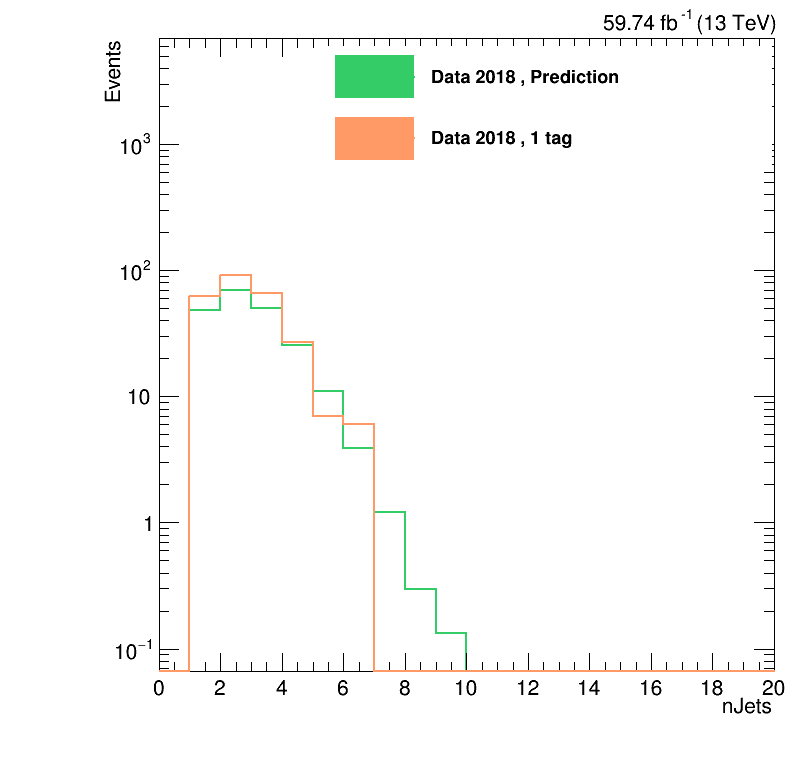

In [28]:
cr_nj_cut = 1
cr_ntag_cut = 0

sr_nj_cut = 1
sr_ntag_cut = 1


for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
 
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 59740 
    outf = var[0]+'_vs_pred.png'
    
    # Plotting  
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    he = {}
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
  
    color_list = [845,806,861,876,597,625]
#     color_list = [845,800,861,806,876,597,625]
 
    data_keys = ['Data 2018']
   
   
    for k in data_keys:
        cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nTags[k]==cr_ntag_cut)
        sr_cut_str=np.logical_and(nJets[k]>=sr_nj_cut, nTags[k]==sr_ntag_cut)
        print(len(var[1][k]))
        print(len(var[1][k][cr_cut_str]))
        print(len(var[1][k][sr_cut_str]))
        i=0
        for i in range(2):
            print(i)
            if i!=0:
                sel_str=sr_cut_str
                leg_str='1 tag'
                w = trg_jet_w[k][sel_str] 
            else:
                sel_str=cr_cut_str
                leg_str='Prediction'
                w = pt_pred_jet_ws[k] 
                
            pt1 = var[1][k] 
            v = pt1[sel_str] 
#             w = trg_jet_w[k][sel_str] 
            
            print(leg_str)
            print(len(w))

            ht[k+leg_str] = create_TH1D( v, axis_title=axis_set, name=k+leg_str, binning=bin_set,weights = w*1)
            ht[k+leg_str].Sumw2()
            ht[k+leg_str].SetLineColor(color_list[i])
            ht[k+leg_str].SetMarkerColor(color_list[i])
            ht[k+leg_str].SetMarkerStyle(20)
            ht[k+leg_str].SetMarkerSize(1.)
            ht[k+leg_str].GetXaxis().SetTitleSize(0.03)
            ht[k+leg_str].GetYaxis().SetTitleSize(0.03)
            ht[k+leg_str].GetXaxis().SetLabelSize(0.03)
            ht[k+leg_str].GetYaxis().SetLabelSize(0.03)
            ht[k+leg_str].SetMaximum(1e+2*(ht[k+leg_str].GetMaximum()))
            ht[k+leg_str].Draw("Hist same")

            he[k+leg_str] = ht[k+leg_str].Clone()
            he[k+leg_str].SetFillColor(color_list[i])
#             he[k+leg_str].Draw("e2 same")

            leg.AddEntry(he[k+leg_str],k+' , '+leg_str)
#         leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

#         i+=1

    leg.Draw()

  

    CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 

var/x_axis minDeltaPhi binning 50 0 3.15
84120
47423
259
0
Prediction
47423
1
1 tag
259
59.74 fb^{-1} (13 TeV)
var/x_axis HT binning 40 0 2000
84120
47423
259
0
Prediction
47423
1
1 tag
259
59.74 fb^{-1} (13 TeV)
var/x_axis MET binning 20 0 2000
84120
47423
259
0
Prediction
47423
1
1 tag
259
59.74 fb^{-1} (13 TeV)
var/x_axis nJets binning 20 0 20
84120
47423
259
0
Prediction
47423
1
1 tag
259
59.74 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/minDeltaPhi_vs_pred_shape.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/HT_vs_pred_shape.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/MET_vs_pred_shape.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/nJets_vs_pred_shape.png has been created


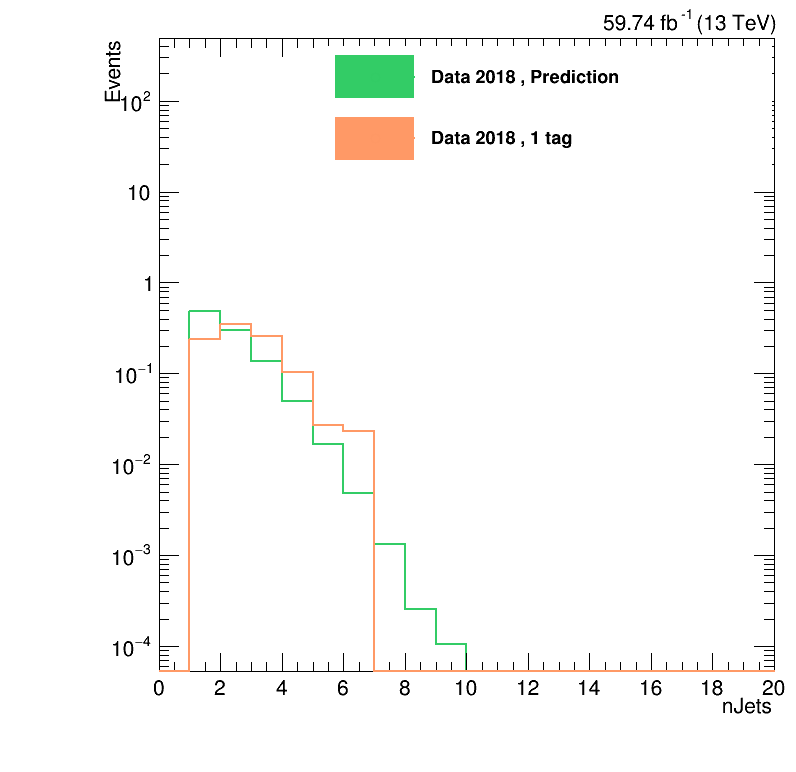

In [29]:
cr_nj_cut = 1
cr_ntag_cut = 0

sr_nj_cut = 1
sr_ntag_cut = 1


for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
 
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 59740 
    outf = var[0]+'_vs_pred_shape.png'
    
    # Plotting  
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    he = {}
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
  
    color_list = [845,806,861,876,597,625]
#     color_list = [845,800,861,806,876,597,625]
 
    data_keys = ['Data 2018']
   
   
    for k in data_keys:
        cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nTags[k]==cr_ntag_cut)
        sr_cut_str=np.logical_and(nJets[k]>=sr_nj_cut, nTags[k]==sr_ntag_cut)
        print(len(var[1][k]))
        print(len(var[1][k][cr_cut_str]))
        print(len(var[1][k][sr_cut_str]))
        i=0
        for i in range(2):
            print(i)
            if i!=0:
                sel_str=sr_cut_str
                leg_str='1 tag'
            else:
                sel_str=cr_cut_str
                leg_str='Prediction'
                
            pt1 = var[1][k] 
            v = pt1[sel_str] 
            w = trg_jet_w[k][sel_str] 
            
            print(leg_str)
            print(len(w))

            ht[k+leg_str] = create_TH1D( v, axis_title=axis_set, name=k+leg_str, binning=bin_set,weights = w*1)
            ht[k+leg_str].Sumw2()
            ht[k+leg_str].SetLineColor(color_list[i])
            ht[k+leg_str].SetMarkerColor(color_list[i])
            ht[k+leg_str].SetMarkerStyle(20)
            ht[k+leg_str].SetMarkerSize(1.)
            ht[k+leg_str].GetXaxis().SetTitleSize(0.03)
            ht[k+leg_str].GetYaxis().SetTitleSize(0.03)
            ht[k+leg_str].GetXaxis().SetLabelSize(0.03)
            ht[k+leg_str].GetYaxis().SetLabelSize(0.03)
            ht[k+leg_str].SetMaximum(1e+3*(ht[k+leg_str].GetMaximum()))
            ht[k+leg_str].DrawNormalized("Hist same")

            he[k+leg_str] = ht[k+leg_str].Clone()
            he[k+leg_str].SetFillColor(color_list[i])
#             he[k+leg_str].Draw("e2 same")

            leg.AddEntry(he[k+leg_str],k+' , '+leg_str)
#         leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

#         i+=1

    leg.Draw()

  

    CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 

In [32]:
variables = [
    
        ['jetTime', tag_jet_time, 50, -13, 13, trg_jet_time],
        ['jetMinDeltaRPVTracks', tag_jet_dr, 50, 0, 3, trg_jet_dr],
        ['jetTMF', tag_jet_tmf, 50, 0, 1, trg_jet_tmf,],
    
    
        ['jetPt', tag_jet_pt, 20, 0, 2000,  trg_jet_pt],
        ['jetEta', tag_jet_eta, 20, -3.15, 3.15, trg_jet_eta,],
        ['jetE', tag_jet_e, 50, 0, 1000, trg_jet_e,],
        ['jetPhi', tag_jet_phi, 20, -3.15, 3.15, trg_jet_phi],
    
     
        ['jetMuonEnergyFraction', tag_jet_muef, 50, 0, 1, trg_jet_muef],
        ['jetElectronEnergyFraction', tag_jet_eleef, 50, 0, 1, trg_jet_eleef],
        ['jetPhotonEnergyFraction', tag_jet_phoef, 50, 0, 1, trg_jet_phoef],
    
        ['jetChargedHadronEnergyFraction', tag_jet_chef, 50, 0, 1, trg_jet_chef],
    
 
#         ['jetPt', tag_jet_pt, 20, 0, 2000,  cr_jet_pts],
    
    
]

var/x_axis jetTime binning 50 -13 13
84120
47423
259
0
Prediction
86528
86528
1
1 tag
259
259
59.74 fb^{-1} (13 TeV)
var/x_axis jetMinDeltaRPVTracks binning 50 0 3
84120
47423
259
0
Prediction
86528
86528
1
1 tag
259
259
59.74 fb^{-1} (13 TeV)
var/x_axis jetTMF binning 50 0 1
84120
47423
259
0
Prediction
86528
86528
1
1 tag
259
259
59.74 fb^{-1} (13 TeV)
var/x_axis jetPt binning 20 0 2000
84120
47423
259
0
Prediction
86528
86528
1
1 tag
259
259
59.74 fb^{-1} (13 TeV)
var/x_axis jetEta binning 20 -3.15 3.15
84120
47423
259
0
Prediction
86528
86528
1
1 tag
259
259
59.74 fb^{-1} (13 TeV)
var/x_axis jetE binning 50 0 1000
84120
47423
259
0
Prediction
86528
86528
1
1 tag
259
259
59.74 fb^{-1} (13 TeV)
var/x_axis jetPhi binning 20 -3.15 3.15
84120
47423
259
0
Prediction
86528
86528
1
1 tag
259
259
59.74 fb^{-1} (13 TeV)
var/x_axis jetMuonEnergyFraction binning 50 0 1
84120
47423
259
0
Prediction
86528
86528
1
1 tag
259
259
59.74 fb^{-1} (13 TeV)
var/x_axis jetElectronEnergyFraction binning 5

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/jetTime_vs_pred.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/jetMinDeltaRPVTracks_vs_pred.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201015/Data/2018/checks/jetTMF_vs_pred.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights struct

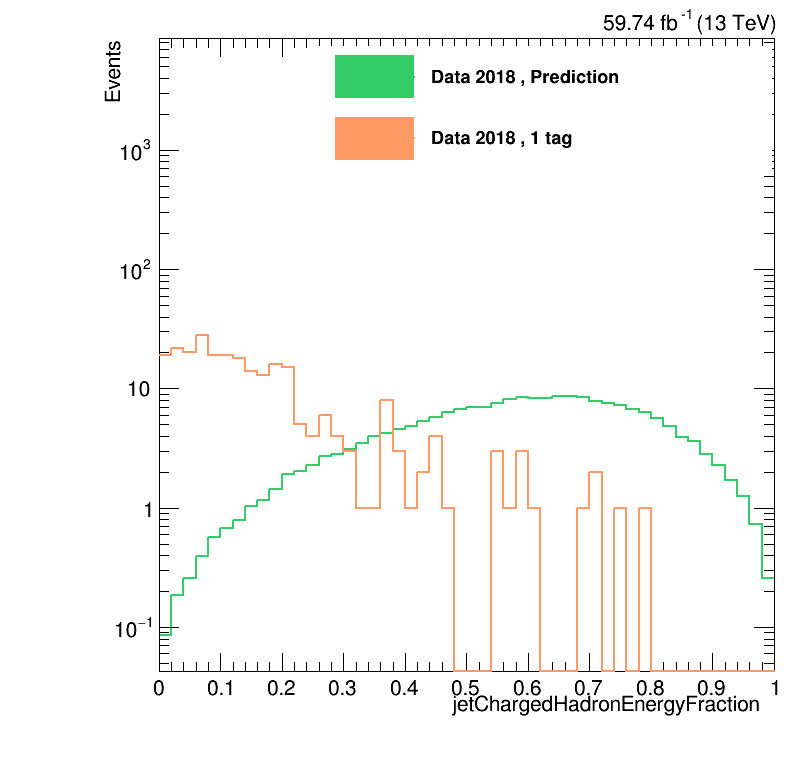

In [33]:
cr_nj_cut = 1
cr_ntag_cut = 0

sr_nj_cut = 1
sr_ntag_cut = 1


for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
 
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 59740 
    outf = var[0]+'_vs_pred.png'
    
    # Plotting  
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    he = {}
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
  
    color_list = [845,806,861,876,597,625]
#     color_list = [845,800,861,806,876,597,625]
 
    data_keys = ['Data 2018']
   
   
    for k in data_keys:
        cr_cut_str=np.logical_and(nJets[k]>=cr_nj_cut, nTags[k]==cr_ntag_cut)
        sr_cut_str=np.logical_and(nJets[k]>=sr_nj_cut, nTags[k]==sr_ntag_cut)
        print(len(var[1][k]))
        print(len(var[1][k][cr_cut_str]))
        print(len(var[1][k][sr_cut_str]))
        i=0
        for i in range(2):
            print(i)
            if i!=0:
                sel_str=sr_cut_str
                leg_str='1 tag'
                pt1 = var[1][k] 
                v = pt1[sel_str] 
                w = trg_jet_w[k][sel_str] 
            else:
                sel_str=cr_cut_str
                leg_str='Prediction'
                # var[5] = trg_jet_pt
                pt1 = var[5][k][sel_str]
                v = pt1.flatten()
                # var[5] = cr_jrt_pts
#                 pt1 = var[5][k] 
#                 v = pt1 
                w = pt_pred_jet_ws[k]
#                 w = pred_jet_ws[k]
                
 
            
            print(leg_str)
            print(len(w))
            print(len(v))

            ht[k+leg_str] = create_TH1D( v, axis_title=axis_set, name=k+leg_str, binning=bin_set,weights = w*1)
            ht[k+leg_str].Sumw2()
            ht[k+leg_str].SetLineColor(color_list[i])
            ht[k+leg_str].SetMarkerColor(color_list[i])
            ht[k+leg_str].SetMarkerStyle(20)
            ht[k+leg_str].SetMarkerSize(1.)
            ht[k+leg_str].GetXaxis().SetTitleSize(0.03)
            ht[k+leg_str].GetYaxis().SetTitleSize(0.03)
            ht[k+leg_str].GetXaxis().SetLabelSize(0.03)
            ht[k+leg_str].GetYaxis().SetLabelSize(0.03)
            ht[k+leg_str].SetMaximum(1e+3*(ht[k+leg_str].GetMaximum()))
            ht[k+leg_str].Draw("Hist same")

            he[k+leg_str] = ht[k+leg_str].Clone()
            he[k+leg_str].SetFillColor(color_list[i])
#             he[k+leg_str].Draw("e2 same")

            leg.AddEntry(he[k+leg_str],k+' , '+leg_str)
#         leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

#         i+=1

    leg.Draw()

  

    CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 